In [44]:
#loading libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from numpy import array

In [45]:
#reading data from csv file that is in same directory as python process
col_list = ["Age (y)","Gender(1, male; 2, female)","BMI(kg/m2)","censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)",
            "drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"]
data1= pd.read_csv("RC Health Care Data-20180820.csv",usecols=col_list)
data1

,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),"censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,43,2,19.3,0,3.0,3.0,1
1,34,1,20.0,0,NaN,NaN,0
2,32,2,20.7,0,NaN,NaN,0
3,59,1,23.1,0,3.0,3.0,0
4,30,2,18.1,0,NaN,NaN,0
...,...,...,...,...,...,...,...
211828,41,1,24.5,0,NaN,NaN,0
211829,31,2,18.8,0,NaN,NaN,0
211830,30,2,17.1,0,NaN,NaN,0
211831,43,1,25.6,0,NaN,NaN,0


In [47]:
# changing columns using .columns() 
data1.columns = ['Age', 'Gender', 'BMI', 'Outcome', 
                'smoking', 'drinking', 'family']
data1

,Age,Gender,BMI,Outcome,smoking,drinking,family
0,43,2,19.3,0,3.0,3.0,1
1,34,1,20.0,0,NaN,NaN,0
2,32,2,20.7,0,NaN,NaN,0
3,59,1,23.1,0,3.0,3.0,0
4,30,2,18.1,0,NaN,NaN,0
...,...,...,...,...,...,...,...
211828,41,1,24.5,0,NaN,NaN,0
211829,31,2,18.8,0,NaN,NaN,0
211830,30,2,17.1,0,NaN,NaN,0
211831,43,1,25.6,0,NaN,NaN,0


In [48]:
#returns true if the data set has null values
data1.isnull().any()

Age         False
Gender      False
BMI         False
Outcome     False
smoking      True
drinking     True
family      False
dtype: bool

In [49]:
#Gives the count of all the null values present in each column
data1.isnull().sum()

Age              0
Gender           0
BMI              0
Outcome          0
smoking     151603
drinking    151603
family           0
dtype: int64

In [50]:
#drop all null values
data1=data1.dropna()
data1

,Age,Gender,BMI,Outcome,smoking,drinking,family
0,43,2,19.3,0,3.0,3.0,1
3,59,1,23.1,0,3.0,3.0,0
9,31,1,22.4,0,3.0,3.0,0
16,25,2,20.3,0,3.0,3.0,0
19,66,1,24.9,0,1.0,3.0,0
...,...,...,...,...,...,...,...
211799,38,1,24.3,0,2.0,3.0,0
211806,57,1,25.1,0,1.0,3.0,0
211812,31,2,22.9,0,3.0,3.0,0
211826,68,2,28.4,0,3.0,3.0,0


In [51]:
#Summary of datatype and count for all ths columns
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60230 entries, 0 to 211832
Data columns (total 7 columns):
Age         60230 non-null int64
Gender      60230 non-null int64
BMI         60230 non-null float64
Outcome     60230 non-null int64
smoking     60230 non-null float64
drinking    60230 non-null float64
family      60230 non-null int64
dtypes: float64(3), int64(4)
memory usage: 3.7 MB
None


In [78]:
count_class_0, count_class_1 = data1.Outcome.value_counts()
df_class_0 = data1[data1['Outcome'] == 0]
df_class_1 = data1[data1['Outcome'] == 1]

Random under-sampling:
1    1172
0    1172
Name: Outcome, dtype: int64


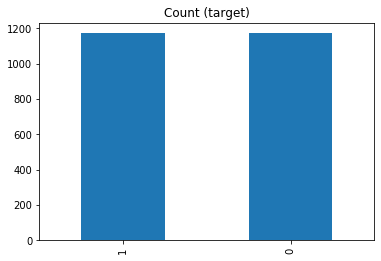

In [101]:
#performing random under sampling to overcome the biased nature of the model
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())
#plot that gives the count of each class
df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (target)');

In [102]:
#target variable after sampling
y_sample= df_test_under.Outcome
#features after sampling
X_sample=df_test_under.drop('Outcome', axis=1)
y_sample

131087    0
38505     0
68678     0
77226     0
183355    0
         ..
211159    1
211313    1
211395    1
211655    1
211832    1
Name: Outcome, Length: 2344, dtype: int64

In [103]:
#adding features to X
X = np.column_stack((X_sample['Age'],X_sample['Gender'],X_sample['BMI'],X_sample['drinking'],
                    X_sample['smoking'],X_sample['family'])
                   )
print(X)

[[46.   2.  23.7  3.   3.   0. ]
 [46.   1.  23.3  1.   1.   0. ]
 [31.   1.  23.5  3.   1.   0. ]
 ...
 [69.   1.  24.9  3.   3.   0. ]
 [50.   1.  23.6  3.   3.   0. ]
 [57.   1.  27.7  2.   1.   0. ]]


In [104]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X = min_max_scaler.fit_transform(X)
X

array([[0.37313433, 1.        , 0.30916031, 1.        , 1.        ,
        0.        ],
       [0.37313433, 0.        , 0.29389313, 0.        , 0.        ,
        0.        ],
       [0.14925373, 0.        , 0.30152672, 1.        , 0.        ,
        0.        ],
       ...,
       [0.71641791, 0.        , 0.35496183, 1.        , 1.        ,
        0.        ],
       [0.43283582, 0.        , 0.30534351, 1.        , 1.        ,
        0.        ],
       [0.53731343, 0.        , 0.46183206, 0.5       , 0.        ,
        0.        ]])

In [105]:
#splitting sampled dataset into train and test dataset
#random_state=0 is used to get the same output as the first split
x_train, x_test, y_train, y_test = train_test_split(X, y_sample, test_size=0.20, random_state=42)
x_train.shape


(1875, 6)

In [106]:
#DNN model
model = Sequential()
model.add(Dense(500, input_dim=6, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=100, batch_size=5, validation_data=(x_test, y_test))

Epoch 1/100
375/375 [==============================] - 1s 4ms/step - loss: 0.5449 - accuracy: 0.7291 - val_loss: 0.5478 - val_accuracy: 0.7399
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.7685 - val_loss: 0.5128 - val_accuracy: 0.7527
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5012 - accuracy: 0.7701 - val_loss: 0.5226 - val_accuracy: 0.7633
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.7760 - val_loss: 0.4863 - val_accuracy: 0.7655
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.4827 - accuracy: 0.7808 - val_loss: 0.4888 - val_accuracy: 0.7783
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4754 - accuracy: 0.7787 - val_loss: 0.4996 - val_accuracy: 0.7783
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4751 - accuracy: 0.7776 - val_loss: 0.4895 - val_accuracy: 0.7697

Epoch 58/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4518 - accuracy: 0.7941 - val_loss: 0.4855 - val_accuracy: 0.7719
Epoch 59/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4541 - accuracy: 0.7952 - val_loss: 0.5034 - val_accuracy: 0.7676
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4538 - accuracy: 0.7968 - val_loss: 0.4928 - val_accuracy: 0.7719
Epoch 61/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4474 - accuracy: 0.8016 - val_loss: 0.5107 - val_accuracy: 0.7761
Epoch 62/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7952 - val_loss: 0.4982 - val_accuracy: 0.7676
Epoch 63/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.7963 - val_loss: 0.4884 - val_accuracy: 0.7719
Epoch 64/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.7963 - val_loss: 0.5139 - val_accuracy:

In [107]:
y_pred_class_nn_1 = model.predict_classes(x_test)

In [108]:
y_pred_class_nn_1

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [109]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))

accuracy is 0.772


In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_class_nn_1)
print(cm)
accuracy_score(y_test, y_pred_class_nn_1)

[[158  76]
 [ 31 204]]


0.7718550106609808

In [122]:
#classification report for precision, recall and f1-score for both class
print('Classification Report:')
print(classification_report(y_test,y_pred_class_nn_1, labels=[0,1]))
confusion = metrics.confusion_matrix(y_test, y_pred_class_nn_1)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       234
           1       0.73      0.87      0.79       235

    accuracy                           0.77       469
   macro avg       0.78      0.77      0.77       469
weighted avg       0.78      0.77      0.77       469

[[158  76]
 [ 31 204]]


In [123]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class_nn_1))

0.7718550106609808
0.7718550106609808


In [124]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

print(1 - metrics.accuracy_score(y_test, y_pred_class_nn_1))

0.2281449893390192
0.22814498933901917


In [125]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class_nn_1))

0.8680851063829788
0.8680851063829788


In [126]:
specificity = TN / (TN + FP)

print(specificity)

0.6752136752136753


In [127]:
recall = TP / float(TP + FN)
print(recall)

0.8680851063829788


In [128]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.3247863247863248
0.32478632478632474


In [129]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class_nn_1))

0.7285714285714285
0.7285714285714285


In [130]:
f1score= 2*(recall * precision) / (recall + precision)
print(f1score)

0.7922330097087379


In [131]:
import numpy
from sklearn.model_selection import StratifiedKFold
seed = 7

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y_sample):
  # create model
    model = Sequential()
    model.add(Dense(500, input_dim=6, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    model.fit(x_train,y_train, epochs=50, batch_size=5, validation_data=(x_test, y_test))
    # evaluate the mode
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 500)               3500      
_________________________________________________________________
dense_134 (Dense)            (None, 100)               50100     
_________________________________________________________________
dense_135 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_136 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_137 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_138 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_139 (Dense)            (None, 1)               

375/375 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.7995 - val_loss: 0.4846 - val_accuracy: 0.7783
Epoch 48/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.7877 - val_loss: 0.5170 - val_accuracy: 0.7612
Epoch 49/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4583 - accuracy: 0.7819 - val_loss: 0.4864 - val_accuracy: 0.7697
Epoch 50/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.7899 - val_loss: 0.4839 - val_accuracy: 0.7804
accuracy: 78.04%
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 500)               3500      
_________________________________________________________________
dense_148 (Dense)            (None, 100)               50100     
_________________________________________________________________
dens

375/375 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.7904 - val_loss: 0.4893 - val_accuracy: 0.7719
Epoch 44/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.7904 - val_loss: 0.5015 - val_accuracy: 0.7804
Epoch 45/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.7888 - val_loss: 0.4846 - val_accuracy: 0.7697
Epoch 46/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7925 - val_loss: 0.4959 - val_accuracy: 0.7783
Epoch 47/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.7947 - val_loss: 0.4907 - val_accuracy: 0.7761
Epoch 48/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4642 - accuracy: 0.7845 - val_loss: 0.4861 - val_accuracy: 0.7761
Epoch 49/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.7947 - val_loss: 0.4808 - val_accuracy: 0.7740
Epoch 50/50

375/375 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7957 - val_loss: 0.4834 - val_accuracy: 0.7719
Epoch 40/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.7941 - val_loss: 0.4896 - val_accuracy: 0.7697
Epoch 41/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4616 - accuracy: 0.7909 - val_loss: 0.4850 - val_accuracy: 0.7719
Epoch 42/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.7867 - val_loss: 0.4881 - val_accuracy: 0.7740
Epoch 43/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7931 - val_loss: 0.4867 - val_accuracy: 0.7676
Epoch 44/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4581 - accuracy: 0.7877 - val_loss: 0.5028 - val_accuracy: 0.7804
Epoch 45/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.7851 - val_loss: 0.4993 - val_accuracy: 0.7569
Epoch 46/50

375/375 [==============================] - 1s 2ms/step - loss: 0.4562 - accuracy: 0.7909 - val_loss: 0.4798 - val_accuracy: 0.7804
Epoch 34/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7883 - val_loss: 0.4947 - val_accuracy: 0.7655
Epoch 35/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4618 - accuracy: 0.7899 - val_loss: 0.4932 - val_accuracy: 0.7825
Epoch 36/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.7904 - val_loss: 0.4836 - val_accuracy: 0.7804
Epoch 37/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7915 - val_loss: 0.4816 - val_accuracy: 0.7846
Epoch 38/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.7877 - val_loss: 0.4860 - val_accuracy: 0.7719
Epoch 39/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4569 - accuracy: 0.7920 - val_loss: 0.4861 - val_accuracy: 0.7740
Epoch 40/50

375/375 [==============================] - 1s 2ms/step - loss: 0.4706 - accuracy: 0.7781 - val_loss: 0.4772 - val_accuracy: 0.7783
Epoch 30/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4616 - accuracy: 0.7920 - val_loss: 0.4922 - val_accuracy: 0.7740
Epoch 31/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7861 - val_loss: 0.4848 - val_accuracy: 0.7697
Epoch 32/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.7893 - val_loss: 0.4945 - val_accuracy: 0.7676
Epoch 33/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.7867 - val_loss: 0.4983 - val_accuracy: 0.7761
Epoch 34/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7925 - val_loss: 0.4847 - val_accuracy: 0.7846
Epoch 35/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7888 - val_loss: 0.4821 - val_accuracy: 0.7804
Epoch 36/50